<a href="https://colab.research.google.com/github/xh313/TidyTuesdayWithPython/blob/main/TidyTuesday140622.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
import seaborn as sns
import numpy as np
from matplotlib.colors import LogNorm
from matplotlib import font_manager as fm
!pip install colour
import colour

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
# Palette
!wget 'https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py'
import palettes as met

--2022-06-14 06:43:38--  https://github.com/BlakeRMills/MetBrewer/raw/main/Python/met_brewer/palettes.py
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py [following]
--2022-06-14 06:43:38--  https://raw.githubusercontent.com/BlakeRMills/MetBrewer/main/Python/met_brewer/palettes.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11849 (12K) [text/plain]
Saving to: ‘palettes.py.3’

palettes.py.3       100%[===================>]  11.57K  --.-KB/s    in 0s      

2022-06-14 06:43:39 (57.8 MB/s) - ‘palettes.py.3’ saved [11849/11849]



In [99]:
# Font control
!wget 'https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc'
font_files = fm.findSystemFonts('.')
# Go through and add each to Matplotlib's font cache.
for font_file in font_files:
    fm.fontManager.addfont(font_file)
    print(font_file)

# Use your new font on all your plots.
plt.rc('font', family='Avenir')

--2022-06-14 06:41:33--  https://github.com/xh313/TidyTuesdayWithPython/raw/main/Avenir.ttc
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc [following]
--2022-06-14 06:41:34--  https://raw.githubusercontent.com/xh313/TidyTuesdayWithPython/main/Avenir.ttc
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1639536 (1.6M) [application/octet-stream]
Saving to: ‘Avenir.ttc.1’

Avenir.ttc.1        100%[===================>]   1.56M  --.-KB/s    in 0.04s   

2022-06-14 06:41:34 (43.8 MB/s) - ‘Avenir.ttc.1’ saved [1639536/1639536]

/content/Avenir.ttc


In [91]:
# Import fips dataset
rawfips = pd.read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2022/2022-06-14/drought-fips.csv')

# Process fips dataset
# Grouping the data to get state averages
fips = rawfips.groupby(['date', 
                     'State'], as_index=False).mean().drop(['FIPS'], axis=1)

# Parse the date column into three different columns (YMD)                     
fips.date = fips.date.apply(pd.to_datetime)
fips['Year'] = fips.date.dt.year
fips['Month'] = fips.date.dt.month
#fips['Day'] = fips.date.dt.day
fips = fips.drop(['date'], axis=1)
fips = fips.groupby(['Year', 'Month', 'State'], as_index=False).mean()

In [92]:
# Preview dataset
fips

,Year,Month,State,DSCI
0,2000,1,AK,0.000000
1,2000,1,AL,182.626866
2,2000,1,AR,121.980000
3,2000,1,AZ,94.350000
4,2000,1,CA,56.426724
...,...,...,...,...
14035,2022,6,VT,0.000000
14036,2022,6,WA,54.897436
14037,2022,6,WI,27.222222
14038,2022,6,WV,2.127273


In [124]:
# Try plotting solely on CA
df = fips[fips['State'] == 'CA'].drop(['State'], axis=1)
#df = df.pivot('Month', 'Year', 'DSCI')
df = df.pivot('Year', 'Month', 'DSCI')  # Vertical
df

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2000,56.426724,16.379310,2.017241,1.366379,0.000000,0.000000,0.517241,5.693103,3.775862,3.175862,0.000000,0.000000
2001,23.448276,37.211207,32.991379,47.581897,56.686207,101.943966,118.437931,137.232759,198.741379,211.624138,206.323276,111.168103
2002,13.262069,20.068966,24.663793,40.679310,60.215517,122.120690,143.924138,150.568966,148.620690,164.700000,138.400862,81.451724
2003,38.452586,46.870690,45.931034,42.186207,26.857759,25.469828,26.489655,25.301724,25.144828,67.193966,44.375000,35.406897
2004,19.534483,17.987069,16.182759,49.814655,101.724138,104.413793,110.905172,136.596552,152.521552,134.034483,81.758621,62.538793
2005,12.375000,8.698276,8.275862,4.051724,1.824138,0.827586,0.637931,0.658621,0.413793,0.258621,7.186207,8.974138
2006,1.044828,10.948276,10.267241,3.030172,3.203448,3.245690,3.314655,3.151724,5.094828,4.668966,7.176724,35.711207
2007,85.244828,116.560345,117.525862,199.965517,236.100000,256.310345,259.148276,259.232759,259.271552,251.951724,235.081897,226.521552
2008,171.282759,82.073276,49.375000,83.475862,132.060345,184.487069,209.065517,247.969828,261.068966,261.452586,229.379310,246.393103


/usr/local/lib/python3.7/dist-packages/seaborn/utils.py:328: UserWarning: Use the colorbar set_ticks() method instead.
  ax_i.set_yticks(newticks)


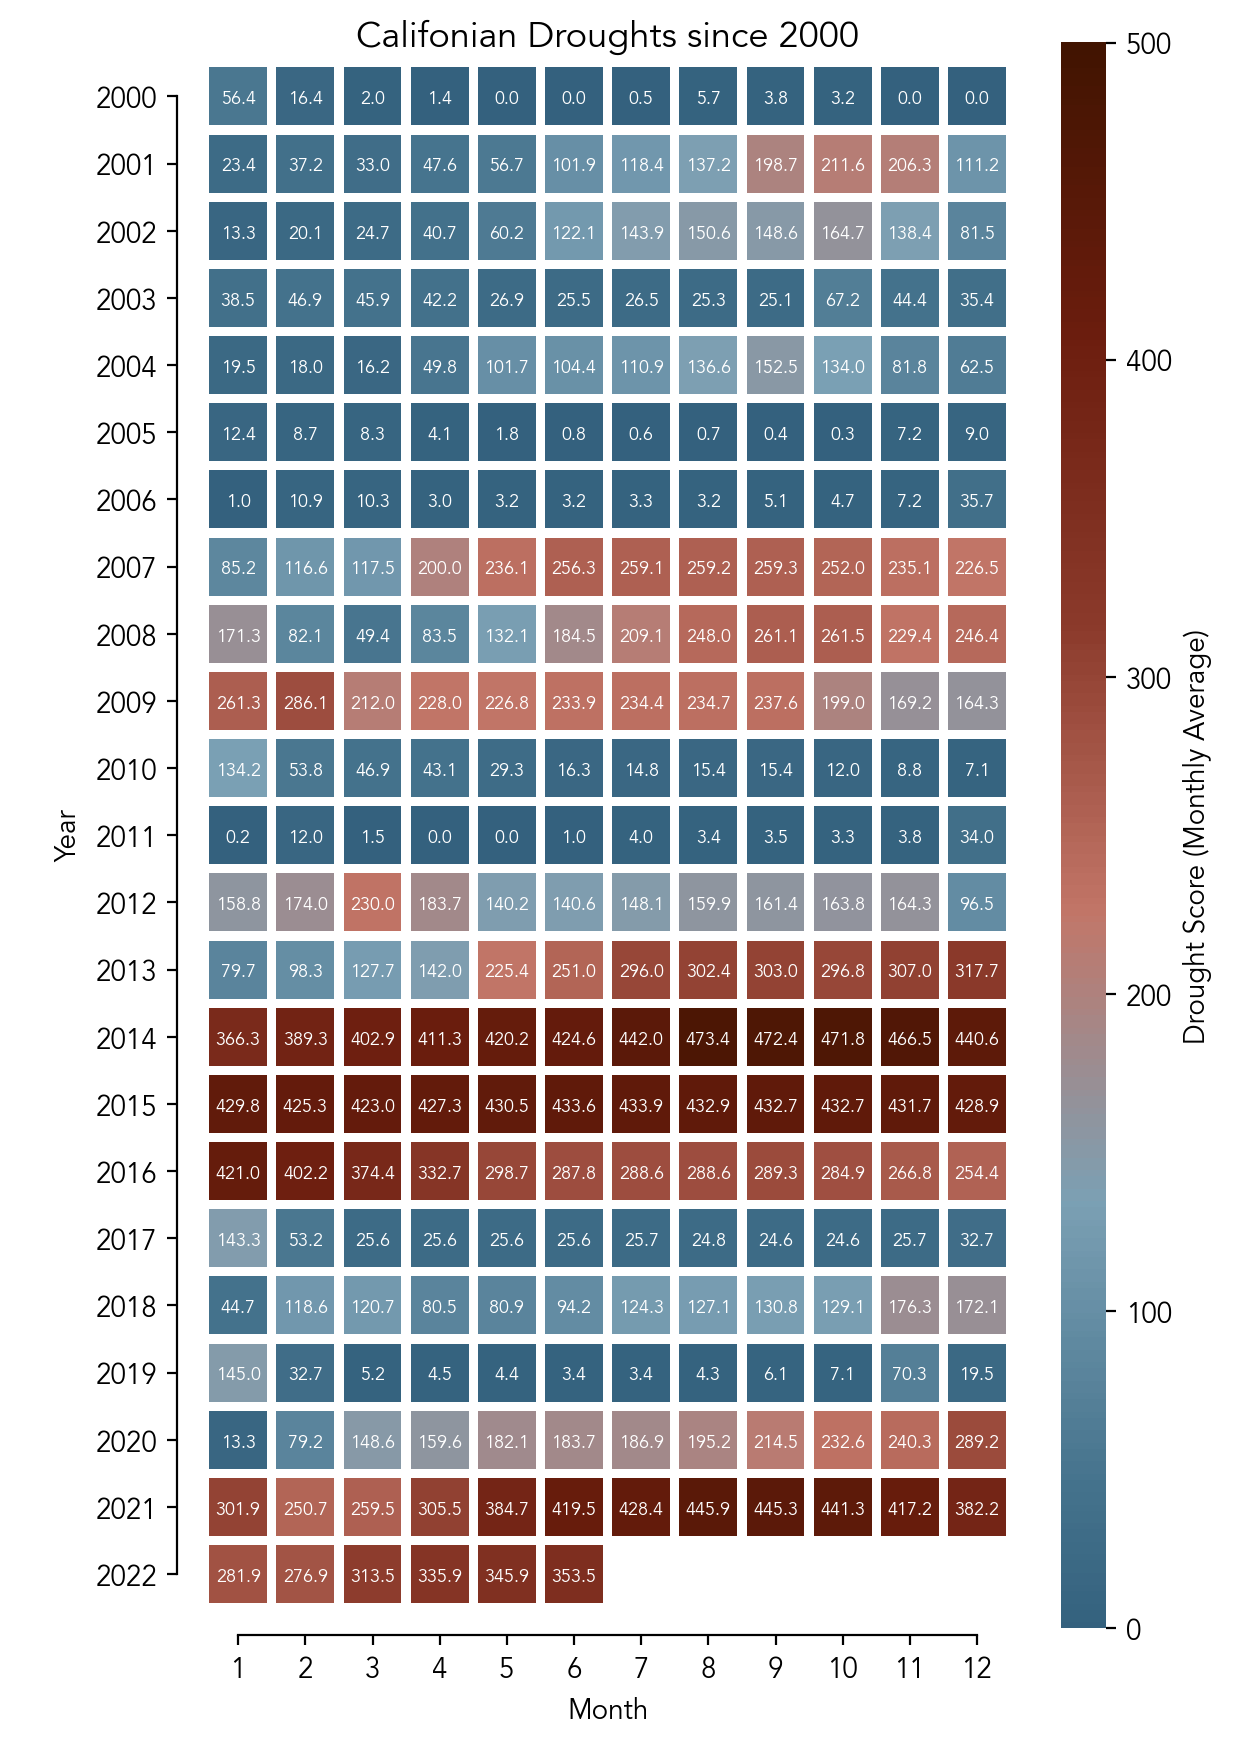

In [171]:
#Continue CA plot
color_bg = 'w'#'#eaedf4'  # background color

plt.figure(figsize=(6.5,10.5),
           dpi=200, 
           facecolor=color_bg)

colors = met.met_brew(name="Troy", 
                      n=200, 
                      brew_type="continuous") #cmap

colors_r = colors[::-1]  # Reverse cmap


ca_ax = sns.heatmap(data=df,
                    annot=True,
                    fmt=".1f",
                    linewidth=3,
                    center=180,
                    #alpha=0.8,
                    linecolor=color_bg,
                    cmap=colors_r,
                    edgecolors=color_bg,
                    #norm=LogNorm(),
                    #vmin=-0.01,
                    vmax=500.01,  # Just to make it show the 500 on the graph
                    annot_kws={"size": 6.5, 
                               "va": "center_baseline"},
                    cbar_kws={'label': 'Drought Score (Monthly Average)',
                              'aspect': 35,
                              #'spacing': 'proportional',
                              #'extendrect': False,
                              },
                          )

ca_ax.set_aspect(1)
ca_ax.set_title('Califonian Droughts since 2000',
          fontdict={'size': 13})
ca_ax.set_xlabel('Month', fontdict={'size': 10})
ca_ax.set_ylabel('\nYear', 
           fontdict={'size': 10})

plt.xticks(rotation=90)
plt.yticks(rotation=0)


sns.despine(offset=10, trim=True)
#plt.legend()
plt.savefig('ca_droughts.png', dpi=300)
plt.show()